# Information Criteria - Examples

Example created by Wilson Rocha Lacerda Junior

## Comparing different information criteria methods

Here we import the NARMAX model, the metric for model evaluation and the methods to generate sample data for tests. Also, we import pandas for specific usage.

In [ ]:
pip install sysidentpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

## Generating sample data
  
The data is generated by simulating the following model:
$y_k = 0.2y_{k-1} + 0.1y_{k-1}x_{k-1} + 0.9x_{k-1} + e_{k}$

If *colored_noise* is set to True:

$e_{k} = 0.8\nu_{k-1} + \nu_{k}$

where $x$ is a uniformly distributed random variable and $\nu$ is a gaussian distributed variable with $\mu=0$ and $\sigma=0.1$

In the next example we will generate a data with 3000 samples with white noise and selecting 90% of the data to train the model. 

In [2]:
x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.2,
                                                   train_percentage=90)

The idea is to show the impact of the information criteria to select the number of terms to compose the final model. You will se why it is an auxiliary tool and let the algorithm select the number of terms based on the minimum value is not a good idea when dealing with data highly corrupted by noise (even white noise) 

Note: You may find different results when running the examples. This is due the fact we are not setting a fixed random generator for the sample data. However, the main analysis remain.

## AIC

0.4144078289610232
       Regressors   Parameters             ERR
0         x1(k-2)   9.0890E-01  8.40512452E-01
1          y(k-1)   1.8986E-01  3.35900940E-02
2   x1(k-1)y(k-1)   9.7886E-02  2.88237556E-03
3  x1(k-2)x1(k-1)  -5.0152E-02  7.21760201E-04
4    y(k-2)y(k-1)   3.5346E-02  5.24733011E-04
5       x1(k-2)^2   1.8610E-02  2.03427785E-04


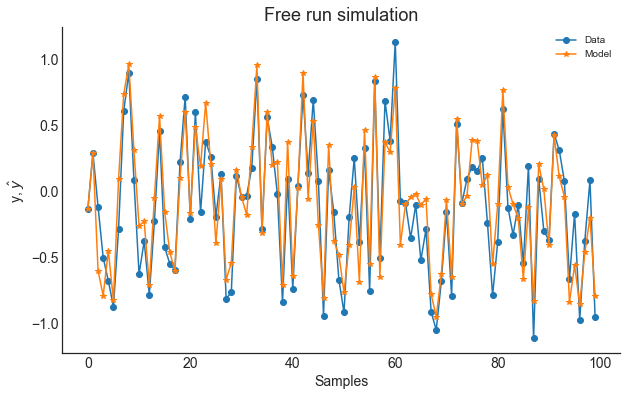

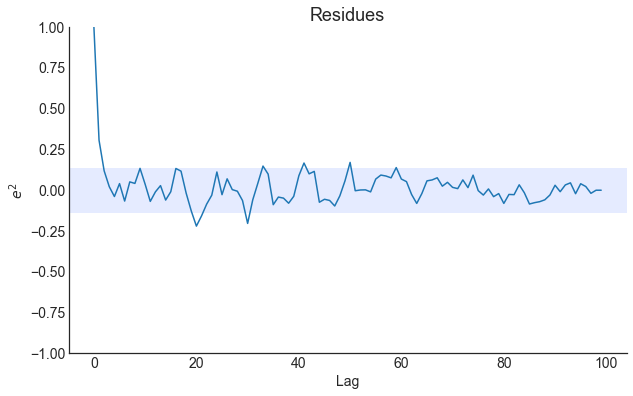

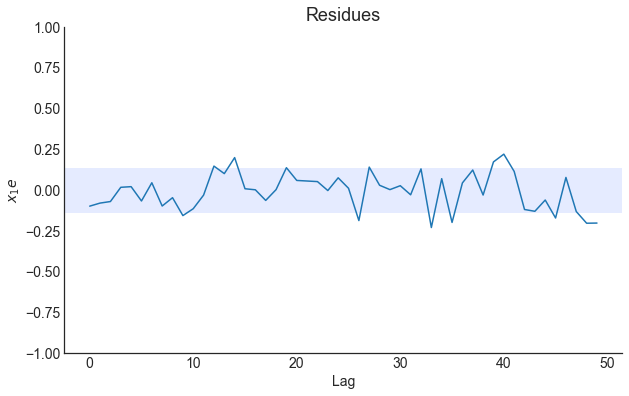

Text(0, 0.5, 'Information Criteria')

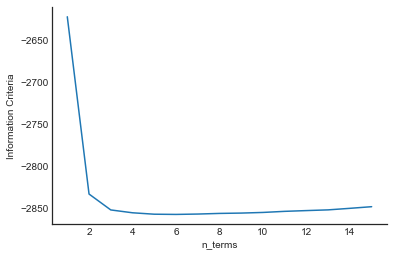

In [3]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=15,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)
plot_results(y=y_valid, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [4]:
model.info_values

array([-2622.34773509, -2832.72904669, -2851.60222422, -2854.97517989,
       -2856.66652431, -2856.91598765, -2856.48019558, -2855.7311691 ,
       -2855.3316563 , -2854.57015136, -2853.2755573 , -2852.37116175,
       -2851.51967168, -2849.69026419, -2847.7470177 ])

As can be seen above, the minimum value make the algorithm choose a model with 5 terms. However, if you check the plot, 3 terms is the best choice. Increasing the number of terms from 3 upwards do not lead to a better model since the difference is very small.

In this case, you should run the model again with the parameters *n_terms=3*! The ERR algorithm ordered the terms in a correct way, so you will get the exact model structure again! 

## BIC 

0.4109889723400256
      Regressors  Parameters             ERR
0        x1(k-2)  9.1184E-01  8.40512452E-01
1         y(k-1)  1.8809E-01  3.35900940E-02
2  x1(k-1)y(k-1)  9.4244E-02  2.88237556E-03


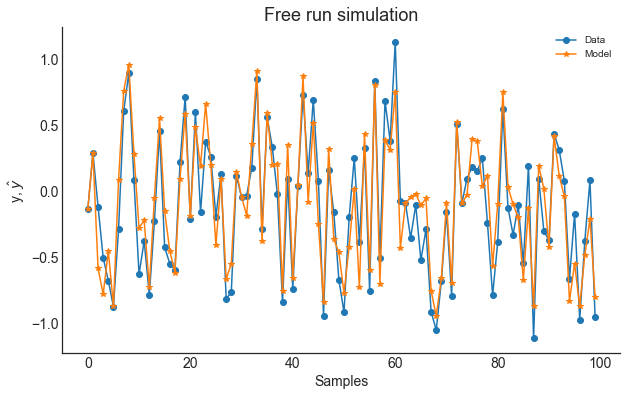

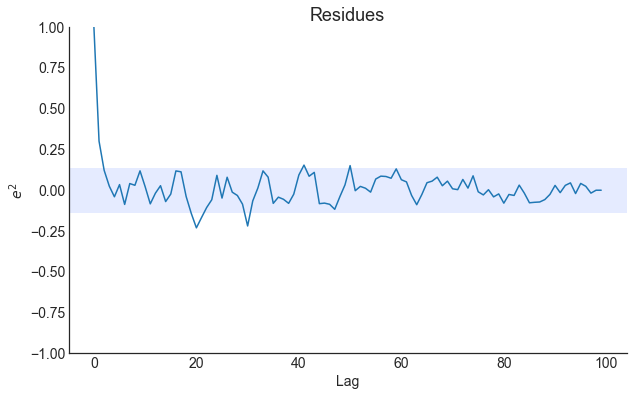

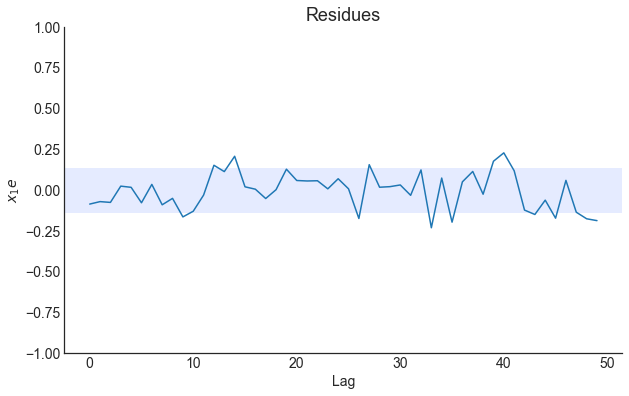

Text(0, 0.5, 'Information Criteria')

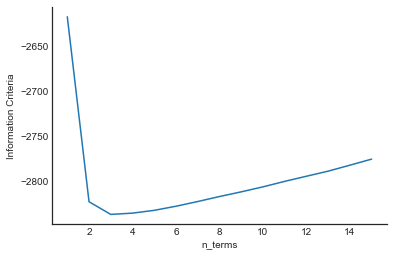

In [5]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=15,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='bic',
    estimator='least_squares',
    basis_function=basis_function
)
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)
plot_results(y=y_valid, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [6]:
model.info_values

array([-2617.54756502, -2823.12870656, -2837.20171401, -2835.77449962,
       -2832.66567397, -2828.11496724, -2822.8790051 , -2817.32980855,
       -2812.13012569, -2806.56845068, -2800.47368655, -2794.76912093,
       -2789.11746079, -2782.48788324, -2775.74446667])

BIC did a better job in this case! The way it penalizes the model regarding the number of terms ensure that the minimum value here was exact the number of expected terms to compose the model. Good, but not always the best method!

## LILC

0.40905103056111236
       Regressors   Parameters             ERR
0         x1(k-2)   9.1082E-01  8.40512452E-01
1          y(k-1)   1.8933E-01  3.35900940E-02
2   x1(k-1)y(k-1)   9.6334E-02  2.88237556E-03
3  x1(k-2)x1(k-1)  -4.7351E-02  7.21760201E-04


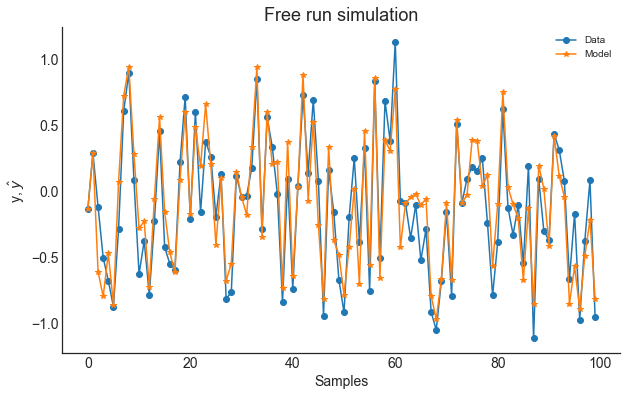

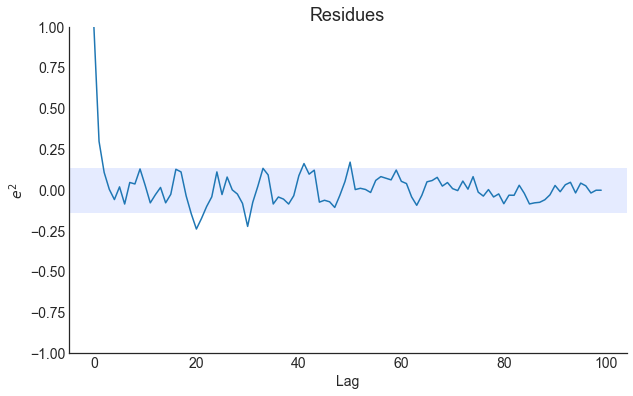

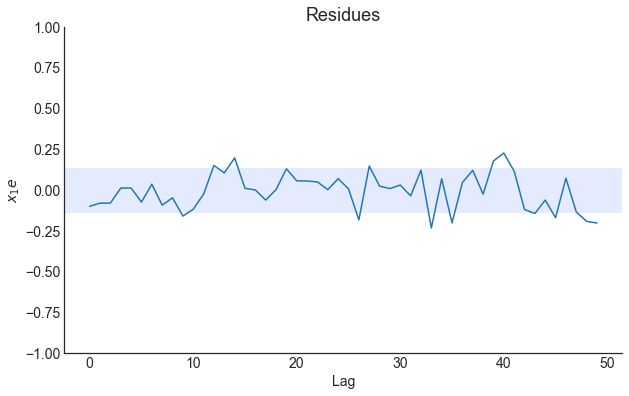

Text(0, 0.5, 'Information Criteria')

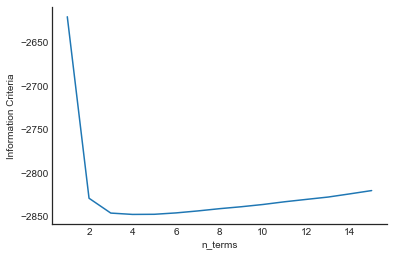

In [7]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=15,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='lilc',
    estimator='least_squares',
    basis_function=basis_function
)
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)
plot_results(y=y_valid, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [8]:
model.info_values

array([-2620.51383984, -2829.06125621, -2846.10053849, -2847.63959892,
       -2847.49704809, -2845.91261619, -2843.64292888, -2841.06000715,
       -2838.82659911, -2836.23119892, -2833.10270962, -2830.36441883,
       -2827.67903351, -2824.01573078, -2820.23858904])

LILC also includes spurious terms. Like AIC, it fails to automatically select the correct terms but you could select the right number based on the plot above!

## FPE

0.4144078289610232
       Regressors   Parameters             ERR
0         x1(k-2)   9.0890E-01  8.40512452E-01
1          y(k-1)   1.8986E-01  3.35900940E-02
2   x1(k-1)y(k-1)   9.7886E-02  2.88237556E-03
3  x1(k-2)x1(k-1)  -5.0152E-02  7.21760201E-04
4    y(k-2)y(k-1)   3.5346E-02  5.24733011E-04
5       x1(k-2)^2   1.8610E-02  2.03427785E-04


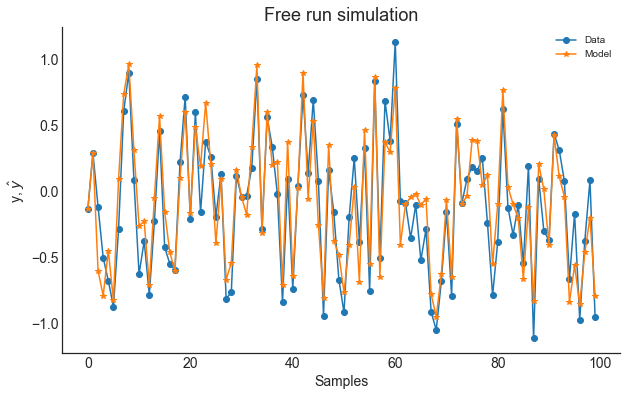

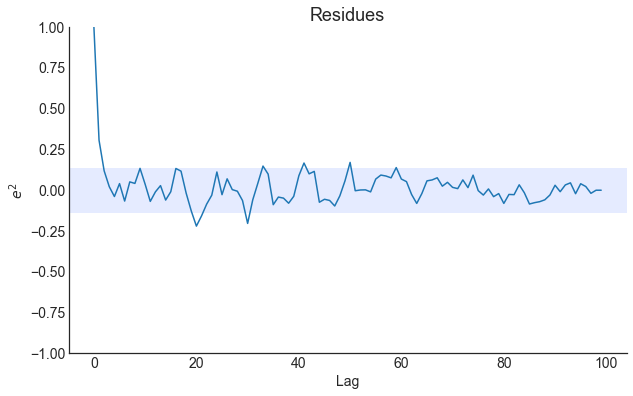

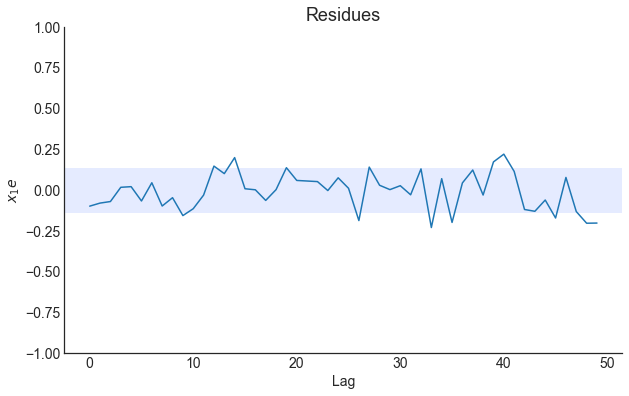

Text(0, 0.5, 'Information Criteria')

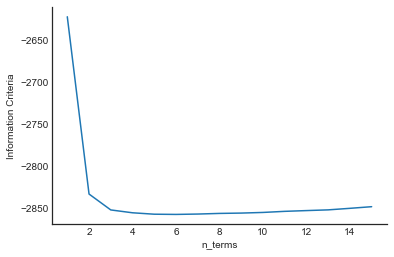

In [9]:
basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=15,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='fpe',
    estimator='least_squares',
    basis_function=basis_function
)
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)
plot_results(y=y_valid, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')

In [10]:
model.info_values

array([-2622.34773426, -2832.72904008, -2851.6022019 , -2854.97512698,
       -2856.66642097, -2856.91580907, -2856.47991201, -2855.7307458 ,
       -2855.33105359, -2854.56932458, -2853.27445685, -2852.36973303,
       -2851.51785516, -2849.68799535, -2847.74422706])

FPE also failed to automatically select the right number of terms! But, as we pointed out before, Information Criteria is an auxiliary tool! If you look at the plots, all the methods allows you to choose the right numbers of terms!

## Important Note

Here we are dealing with a known model structure! Concerning real data, we do not know the right number of terms so the methods above stands as excellent tools to help you out!

If you check the metrics above, even with the models with more terms, you will see excellent metrics! But System Identification always search for the best model structure! Model Structure Selection is the core of NARMAX methods! In this respect, the examples are to show basic concepts and how the algorithms work!